# Les méthodes numériques pour la résolution d'équations

### 1) Généralités

Au début du cours, nous avons vu comment procéder pour résoudre des équations dans R, pour des polynomes d'un ordre inférieur à 3 nous avions procédé par résolution analytique sauf qu'on était limité lorsqu'il fallait le faire sur des polynomes d'un ordre supérieur. C'est alors que nous avions commencé à aborder des méthodes numériques pour contourner ce problème. 

Et donc ici, toujours à la recherche de x, on travaillera sur une fonction f(x) qui soit non linéaire, c'est à dire, une fonction qui n'est pas exprimé sous la forme f(x)=Ax+b.

Pour ce faire, on dira que nous allons utiliser des méthodes itératives car l'idée primaire ici serait de construire une suite x qui convergera (au plus vite) vers x_recherché et pour s'en rassurer il faudra dès le départ, veiller à ce que notre fonction f soit au moins continue sur son ensemble de départ. 

### 2) Travail à faire

Nous verrons alors 5 méthodes numériques de résolutions des systèmes non linéaires , nous les implémenterrons, nous partirons sur des hypothèses et à aboutirons à des thèses en précisant les limites d'utilisation de chacune des méthodes, leur vitesse de convergence rspective et, la précision des solutions proposées en fonction du nombre d'itérations tel que cela nous été demandé. Enfin, nous aurons le plasiir de comparer nos résultats obtenus avec ceux des méthodes proposées au sein du module scipy.optimize : Allons-nous obtenir les mêmes valeurs ?

### 3) Hypothèse générale

Afin de faire de ce TP Notebook une référence parfaite à l'appréhension des méthodes numériques pour la résolution d'équations non linéaires, nous partirons sur une fonction :  
définit sur un intervale [a,b]=[0.5,1.0]

cette fonction nous la testerons au fur et à mesure que nous allons implémenter chaque méthode, elle sera l'élément commun et essentiel que nous aborderons en commentaire afin de comparer aux mieux les méthodes.

Tout d'abord, nous avons une fonction f(x) qui soit non linéaire,
en la résolvant de façon théorique tel que appris à l'école
nous savons que la valeur de la fonction dépend de la valeur de x ainsi :

- nous devons d'abord poser f(x)=0
- ce qui nous emmène à résoudre l'équation x-0,2*sin(x)-0,5 = 0
- ensuite la fonction pouvait étant définit sur un intervalle [a,b] on est confiant, du moemnt où f est converge que la racine x recherché s'y trouve.
- Et pour des raisons analytics, on en venait à ressortir ce qu'on appel un tableau de variation 

Cependant, dans le cadre de ce travail nous allons nous intérersser à résoudre cette fonction non pas comme à l'ancienne mais plutôt à l'aide des méthodes de dichotomie, fausse position, sécante, newton, point fixe. nous apppliquerons aussi une précision de calcul de  et, un nombre d'itération 20 par défaut, choisit au hasard. Vous pourrez aussi constater que a=0.5 alors que b=1.0 sauf dans les cas de point fixe et nuewtion où il s'agira uniquement de 1.0 .

Nous noterons f_dx, la dérivée première de f par rapport à x :
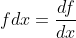

### 4) Démonstration

#### Importations nécessaire et préparation :

In [134]:
import numpy as np
from math import sin, pi, exp, log, cos, sqrt
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton, fixed_point

#### Notre fonction f(x) :

In [111]:
f=lambda x:x-0.2*sin(x)-0.5 

##### 4.1. Méthode dichotomie ou de la bissection :

Il semble que cette méthode paraît bien évidente à comprendre de part sa nomination ... dichotomie : traduisons cela par diviser pour mieux régner. 

Puisque nous sommes partons à la quête de la valeur de x la plus stable possible et présente dans un intervalle [a,b], nous allons procéder par la division de cet intervalle en intervalle de plus en plus petit. Cette division a lieu au milieu (m) de l'intervalle. et puisqu'il s'agit d'une division < di >, le milieu sera la somme des bornes sur 2. Ainsi, il existera au moins une solution entre (a,m) ou (m,b).

In [118]:
def dichotomie(f,a,b,precision,iteration):
    i=0
    while abs(b - a) > precision and i<iteration:
        m = (a+b) / 2
        if f(a) * f(m)  < 0:
            #a = a #logiquement cette ligne est facultative
            b = m
        else:
            a = m
            #b = b #logiquement cette ligne est facultative
        print("itération "+str(i) +" | " + "x("+str(i)+") = " +str(m))
        print("__________________________________________________")
        i=i+1
    return "la valeur finale de x trouvée est "+str(m)

Application de l'algorithme :

In [138]:
res=dichotomie(f , 0.5, 1.0, 0.0000001,20)
print(res)
%timeit()

itération 0 | x(0) = 0.75
__________________________________________________
itération 1 | x(1) = 0.625
__________________________________________________
itération 2 | x(2) = 0.5625
__________________________________________________
itération 3 | x(3) = 0.59375
__________________________________________________
itération 4 | x(4) = 0.609375
__________________________________________________
itération 5 | x(5) = 0.6171875
__________________________________________________
itération 6 | x(6) = 0.61328125
__________________________________________________
itération 7 | x(7) = 0.615234375
__________________________________________________
itération 8 | x(8) = 0.6162109375
__________________________________________________
itération 9 | x(9) = 0.61572265625
__________________________________________________
itération 10 | x(10) = 0.615478515625
__________________________________________________
itération 11 | x(11) = 0.6153564453125
__________________________________________________
itérat

Pour la méthode de bissection, on peut constater qu'on atteint une certaine stabilité à partir de la 18e itération et donc que la valeur de notre x n'est pas loin d'un 0.615468... quelque chose (...)

##### 4.2.  Méthode de la fausse position :

Ici, c'est en choissant l’extrémité fixe (A = (a, f (a)) ou B = (b, f (b))) de la méthode, qu'on va construire une suite x qui puisse convergr mais seulement, il faudrait dès le départ partir sur un point fixe qui va varier selon les itérations.

In [121]:
def fausse_p(f,a,b,p,iteration):
    x = a - ( b - a ) * f(a) / ( f(b) - f(a) )
    y = a - ( x - a ) * f(a) / ( f(x) - f(a) )
    i=0
    while abs(x - y) >= p and i<iteration:
        y = a - ( x - a ) * f(a) / ( f(x) - f(a) )
        x = y
        print("itération "+str(i) +" | " + "x("+str(i)+") = " +str(x))
        print("__________________________________________________")
        i=i+1
    return "la valeur finale de x trouvée est "+str(x)  


res = fausse_p(f, 0.5, 1.0, 0.0000001,20)
print(res)

itération 0 | x(0) = 0.6154935000145942
__________________________________________________
la valeur finale de x trouvée est 0.6154935000145942


incroyable mais vrai, il n'a fallu qu'une seule itération pour obtenir la valeur de x recherché.

##### 4.3. Méthode de la sécante:

Imaginez-vous dans une situation où il vous est difficile d'expliciter la dérivée de la fonction f, utiliser la méthode de newton que nous verrons tout juste après et qui traite sur les dérivée des fonctions, ne nous aidera pas, car cela ne sera pas aussi simple que ça, pour y pallier, la méthode de la sécante propose que nous puissions remplacer f par ce qu'elle appel le taux d'accroissement de f sur un intervalle minime. Après le choix d'une intervalle, on va remplacer notre f par la sécante qui passe par les points de cett eintervalle (a,f(a)) et (b,f(b)) pour ensuite trouver une valeur de x comme étant l'abscisse du point où cette droite affine obtenue intercepte l'axe des x et on en déduire que cela sera optimale tout comme pour la méthode de la dichotomie une fois qu'on aura répéter le procéder sur l'intervalle [a,x] ou [x,b] selon le signe de f(a) et f(b) que nous allons aussi comparer. La méthode de la sécante est aussi une variante de la fausse position.

In [141]:
def secante(f,a,b,p,iteration):
    i,x=0,0
    while abs(b-a) > p and i<iteration :
        x = b-f(b)*( b - a ) / ( f(b) - f(a) )
        if f(a)*f(b)<0:
            a = a
            b = x
        else:
            a = x 
            b = b
        print("itération "+str(i) +" | " + "x("+str(i)+") = " +str(x))
        print("_____________________________________________________")
        i=i+1
    return "la valeur finale de x trouvée est "+str(x)


res = secante(f , 0.5, 1.0, 0.0000001,20)
print (res)

itération 0 | x(0) = 0.6121224812175966
_____________________________________________________
itération 1 | x(1) = 0.6154935000145942
_____________________________________________________
itération 2 | x(2) = 0.6154681636499884
_____________________________________________________
itération 3 | x(3) = 0.6154681694899552
_____________________________________________________
itération 4 | x(4) = 0.6154681694899653
_____________________________________________________
itération 5 | x(5) = 0.6154681694899654
_____________________________________________________
itération 6 | x(6) = 0.6154681694899654
_____________________________________________________
la valeur finale de x trouvée est 0.6154681694899654


On peut remarquer que par la méthode de la sécante, on atteint une certaine stabilité (valeur de x_recherché) à partir de 6e itération, ce qui est encore bien meilleure que ce que nous offre (en partant même du résultat obtenu) la dichotomie.

##### 4.4. Méthode de newton :

Très souvent, cette méthode exige que la fonction soit deux fois continuement différentiable c'est à dire qu'elle admet une dérivée seconde et est continue. ici on part d'une certaine valeur x qu'on considère valeur approchée de la solution en posant x=x0. Et lors du procédé de cet algorithme on fixe un critère d'arrêt souvent utilisé et qui conciste à s'arrêter dès qu'on se rapproche de plus en plus de 0 |x(k+1)-x(k)| < e et de x_recherhé.

In [135]:
def _newton(f,f_dx,a,e,iteration):
    x=a #initialisation x(0)=a
    i=0
    k = 1#
    while k >= e and i<iteration:
        x = x - f(x)/f_dx(x)
        k = abs(x - a)
        print("itération "+str(i) +" | " + "x("+str(i)+") = " +str(x))
        print("_____________________________________________________")
        i=i+1
    return "la valeur finale de x trouvée est "+str(x)
    

f_dx=lambda x:1-0.2*cos(x)
res=_newton(f , f_dx , 1.0 , 0.00000001,20)  #
print(res)

itération 0 | x(0) = 0.6281073003279074
_____________________________________________________
itération 1 | x(1) = 0.6154793037449435
_____________________________________________________
itération 2 | x(2) = 0.6154681694985198
_____________________________________________________
itération 3 | x(3) = 0.6154681694899653
_____________________________________________________
itération 4 | x(4) = 0.6154681694899654
_____________________________________________________
itération 5 | x(5) = 0.6154681694899654
_____________________________________________________
itération 6 | x(6) = 0.6154681694899654
_____________________________________________________
itération 7 | x(7) = 0.6154681694899654
_____________________________________________________
itération 8 | x(8) = 0.6154681694899654
_____________________________________________________
itération 9 | x(9) = 0.6154681694899654
_____________________________________________________
itération 10 | x(10) = 0.6154681694899654
__________________

La méthode de newton ici semble être très optimale rien qu'en constatant qu'à partir de la 5e itération, on atteint la veleur de x_recheré = 0.6154681694899654

##### 4.5. Méthode des approximations successives ou méthode de point fixe :

La méthode de point fixe est une méthode très intéressante du fait qu'elle permet en partant d'une fonction de départ donnée f, d'obtenir une fonction dite auxilliaire. Autrement, c'est la transformation d'une fonction donnée en un problème équivalent. Cette recher pemet alors de trouver plusieurs autres fonctions auxilliaires ce qui peut nous offrir plusieurs possibilités pour aller à la découverte de notre x. Cependant, elle nécessite que la fonction auxilliaire à traiter puisse être convergente afin d'assurer l'exactitude de x. 

Nous noterons toutes fonctions auxilliaire de f par g(x).
ainsi dans le cadre de ce travaille et partant de notre exemple typique nou svous montrons comment nous procédons pour ressortir notre fonction auxillaire g(x) :

* recherchons une expression de la forme x=g(x) avec g(x) fonction auxilliare déduite de f(x) : 

* posons f(x)=0 :


* ressortons la forme x=g(x) en partant de l'équation : 

* Nous pouvons donc conclure que pour 
la fonction auxiliaire est : 

In [142]:
def point_fixe(g, x0 ,iteration):  
    i = 0    
    x = x0
    while (i < iteration):       
        x = g(x)
        print("itération "+str(i) +" | " + "x("+str(i)+") = " +str(x))
        print("_____________________________________________________")
        i=i+1
    return "la valeur finale de x trouvée est "+str(x)

In [146]:
g=lambda x:0.2*sin(x)+0.5
res=point_fixe(g, 1,21)#exception faite nombre d'itération = 21
print(res)

itération 0 | x(0) = 0.6682941969615793
_____________________________________________________
itération 1 | x(1) = 0.6239296077689234
_____________________________________________________
itération 2 | x(2) = 0.6168457778597818
_____________________________________________________
itération 3 | x(3) = 0.6156930241911159
_____________________________________________________
itération 4 | x(4) = 0.6155048854891813
_____________________________________________________
itération 5 | x(5) = 0.6154741651586209
_____________________________________________________
itération 6 | x(6) = 0.6154691485844702
_____________________________________________________
itération 7 | x(7) = 0.6154683293766777
_____________________________________________________
itération 8 | x(8) = 0.6154681955995678
_____________________________________________________
itération 9 | x(9) = 0.6154681737536803
_____________________________________________________
itération 10 | x(10) = 0.6154681701862328
__________________

Le constat est simple : il a fallu attendre 20 itérations pour que x soit trouvé.

##### 4.1. Utilisation des méthodes numériques présentes dans le module Optimize de la librairie scipy du langage python :

In [133]:
dichotoPython = bisect(f,0.5,1.0) 
newtonPython = newton(f,1.0,f_dx) 
pfPython = fixed_point(g,1.0)
print("*********************************")
print("******méthode de dichotomie******")
print("*********************************")
print("\n")
print("résultat selon python : ")
print(dichotoPython)
print("\n")
print("*********************************")
print("********méthode de newton********")
print("*********************************")
print("\n")
print("résultat selon python : ")
print(newtonPython)
print("\n")
print("*********************************")
print("******méthode de point fixe******")
print("*********************************")
print("\n")
print("résultat selon python : ")
print(pfPython)
print("\n")

*********************************
******méthode de dichotomie******
*********************************


résultat selon python : 
0.615468169491578


*********************************
********méthode de newton********
*********************************


résultat selon python : 
0.6154681694899653


*********************************
******méthode de point fixe******
*********************************


résultat selon python : 
0.6154681694899654




### 5) Thèses :

##### Valeur de x :

Enfin, après avoir trouvé pour notre fonction la valeur de x, on constate que le résultat trouvé diffère d'une fonction à une autre mais que de façon générale ça donnerait quelque chose du genre :
x = 0.6154681694899654 comme valeur la plus stable de x où celui-ci trouve sa convergence.

##### Comparaison des méthodes :

On peut aussi selon le nombre d'itération dire la méthode de la sécante semble la plus otpimale du fait qu'il n'a fallut que d'une itéation pour atteindre cette valeur, suivit de la méthode de newton (5 itéarations), la sécante (6 itérations), la bissection ou dichotomie (18 itérations) et enfin la plus lente et la moins optimale la méthode de point fixe (qui a nécessité 20 itérations).

##### Mon implémentation vs Scipy.Optimize :
 _________________________________________________
| M    : Scipy.Optimize     | Mon implemenation   |
 _________________________________________________ 

| poif : 0.6154681694899654 | 0.6154681694899654  |
 _________________________________________________ 

| newt : 0.6154681694899653 | 0.6154681694899654  |
 _________________________________________________ 
                                               
| dich : 0.615468169491578  | 0.6154685020446777   |
 _________________________________________________

BINGO, ce que nous avons implémenté présente plus d'une méthode qui renseigne la valeur exacte de 0,6154681694899654 alors que la léthode de newton par exemple du point de vu de python nécessiterai encore plus d'itération. Par contre il me semble que notre implémentation de la méthode de dichotomie renseigne la valeur de x encore plus lentemment que celle de python.

En espérant avoir fait de ce TP Notebook une bonne référence pour l'appréhension des méthodes numériques pour la résolution nous restons ouvert pour n'importe quelles propositons.

Merci.